In [1]:
import os
os.listdir("/content/")

['.config', 'rounds2.csv', 'companies.txt', 'mapping.csv', 'sample_data']

In [0]:
import pandas as pd
companies = pd.read_csv('companies.txt',delimiter="\t",encoding = 'palmos')
rounds2   = pd.read_csv('rounds2.csv',encoding ='ISO-8859-1')
mapping   = pd.read_csv('mapping.csv',encoding = 'ISO-8859-1')

In [3]:
companies.head()

permalink  ...  founded_at
0                  /Organization/-Fame  ...         NaN
1               /Organization/-Qounter  ...  04-09-2014
2  /Organization/-The-One-Of-Them-Inc-  ...         NaN
3                /Organization/0-6-Com  ...  01-01-2007
4       /Organization/004-Technologies  ...  01-01-2010

[5 rows x 10 columns]

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2.head()

company_permalink  ... raised_amount_usd
0                  /organization/-fame  ...        10000000.0
1               /ORGANIZATION/-QOUNTER  ...               NaN
2               /organization/-qounter  ...          700000.0
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-  ...         3406878.0
4                /organization/0-6-com  ...         2000000.0

[5 rows x 6 columns]

In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [8]:
mapping.head()

category_list  ...  Social, Finance, Analytics, Advertising
0            NaN  ...                                        0
1             3D  ...                                        0
2    3D Printing  ...                                        0
3  3D Technology  ...                                        0
4     Accounting  ...                                        1

[5 rows x 10 columns]

In [48]:
##CHECKPOINT 1
# How many unique companies are present in rounds2?
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
len(rounds2['company_permalink'].unique())

66370

In [18]:
#How many unique companies are present in companies?
companies['name'] = companies['name'].str.lower()
len(companies['name'].unique())

66038

In [19]:
#Are there any companies in the rounds2 file which are not present in companies? Y
len(rounds2[~(rounds2.company_permalink.isin(companies.permalink))])

30

In [0]:
#Merge the two data frames to generate a master frame.
master_frame = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')

In [21]:
master_frame.shape

(114949, 16)

In [22]:
master_frame.head()

company_permalink  ...  founded_at
0                  /organization/-fame  ...         NaN
1               /organization/-qounter  ...  04-09-2014
2               /organization/-qounter  ...  04-09-2014
3  /organization/-the-one-of-them-inc-  ...         NaN
4                /organization/0-6-com  ...  01-01-2007

[5 rows x 16 columns]

In [0]:
#Total observations in the master_frame
#114949 rows
#6 coulumns


In [34]:
#Null values present in each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                     30
name                          31
homepage_url                6160
category_list               3431
status                        30
country_code                8686
state_code                 10953
region                     10175
city                       10172
founded_at                 20541
dtype: int64

In [35]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.03
name                        0.03
homepage_url                5.36
category_list               2.98
status                      0.03
country_code                7.56
state_code                  9.53
region                      8.85
city                        8.85
founded_at                 17.87
dtype: float64

In [0]:
#The data is not ready for analysis due to the presence of null values which may result in duplicacy of records.
#The column funding_round_code can be removed as it has highest percentage of null values and it doesnt add value to our analysis.
#Dropping funding_round_code:
master_frame.drop('funding_round_code',axis=1,inplace=True)

In [38]:
#Checking the statuses of the companies so that we can avoid the companies which have "closed" status:
master_frame['status'].value_counts()

operating    90132
acquired     11745
closed        8716
ipo           4326
Name: status, dtype: int64

In [0]:
#Dropping the companies which are closed.
master_frame = master_frame[master_frame['status']!='closed']

In [40]:
#Reconfirming if the closed status companies are dropped:
master_frame['status'].value_counts()

operating    90132
acquired     11745
ipo           4326
Name: status, dtype: int64

In [0]:
import numpy as np
# We set all zero values in raised_amount_usd to NaN. A zero can cause a problem when using a log transform
master_frame.loc[master_frame.raised_amount_usd == 0, 'raised_amount_usd'] = np.nan
#removing the rows where raised_amount_usd is not provided
master_frame = master_frame[~master_frame['raised_amount_usd'].isna()]

In [45]:
master_frame.shape

(87500, 15)

In [47]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.02
name                        0.02
homepage_url                4.26
category_list               0.72
status                      0.02
country_code                5.26
state_code                  7.10
region                      6.50
city                        6.50
founded_at                 15.89
dtype: float64

In [0]:
#CHECKPOINT 2:
#Average Values of Investments for Each of these Funding Types
#Average funding amount of venture type
#Average funding amount of angel type
#Average funding amount of seed type
#Average funding amount of private equity type
#Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [55]:
#overview of funding round types:
print(master_frame['funding_round_type'].value_counts())
print('*'*20)
print('The Funding round type which has maximum count:',master_frame['funding_round_type'].max())

venture                  46614
seed                     21659
debt_financing            6228
angel                     4276
grant                     1966
private_equity            1803
undisclosed               1462
convertible_note          1349
equity_crowdfunding        978
post_ipo_equity            570
product_crowdfunding       365
post_ipo_debt              139
non_equity_assistance       65
secondary_market            26
Name: funding_round_type, dtype: int64
********************
The Funding round type which has maximum count: venture


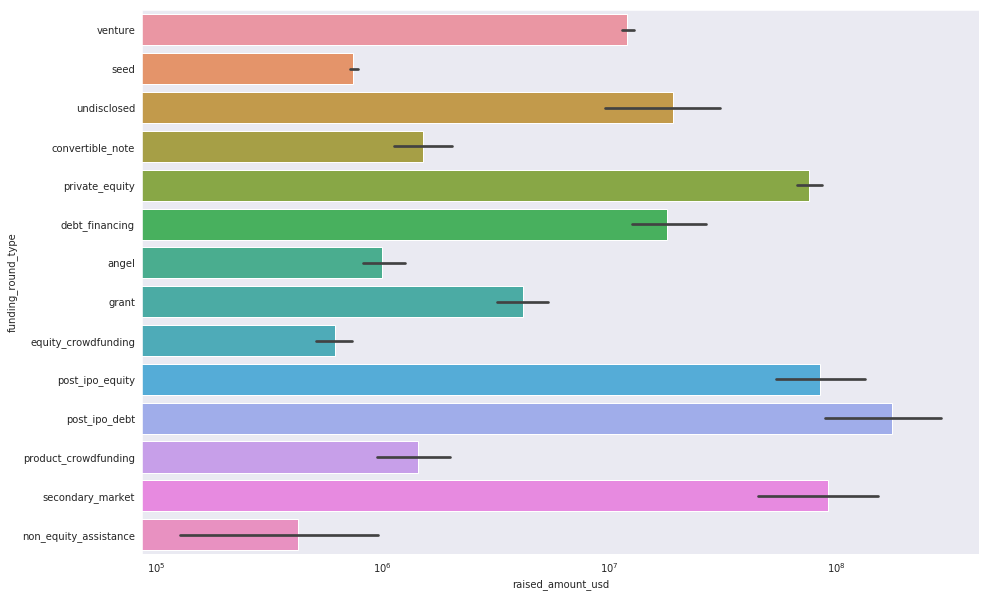

In [57]:
#To obtain a bar graph about which funding round types gets highest funding.
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("dark")
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame)
ax.set_xscale('log')
plt.show()

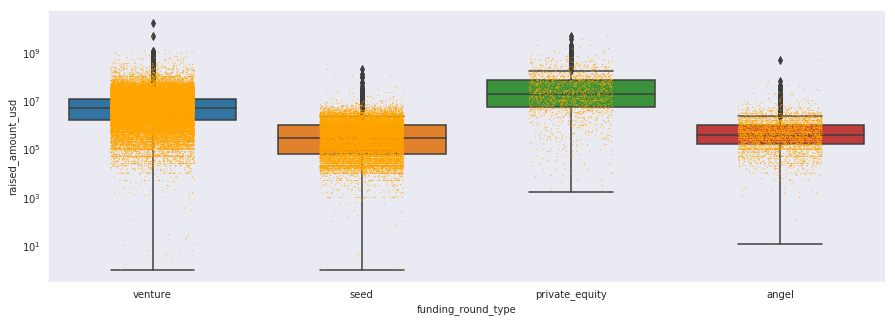

In [58]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]
plt.figure(figsize=(15, 5))
ax = sns.boxplot(y='raised_amount_usd', x="funding_round_type", data=master_frame)
ax = sns.stripplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, color="orange", jitter=0.2, size=1)
ax.set_yscale('log')
plt.show()

In [59]:
master_frame[master_frame['funding_round_type']=='venture']['raised_amount_usd'].describe()

count    4.661400e+04
mean     1.190295e+07
std      8.937643e+07
min      1.000000e+00
25%      1.646011e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [60]:
# By grouping each funding round type and getting the mean raised_amount_usd
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.570156e+07
venture           1.190295e+07
angel             9.865612e+05
seed              7.417633e+05
Name: raised_amount_usd, dtype: float64

In [62]:
# Let us find which founding round type is best suitable for spark funds to invest in.(constraints being 5 million to 15 million)
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().between(5000000,15000000,inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

In [0]:
# Checkpoint 3: Country Analysis
#Analysing the Top 3 English-Speaking Countries:
#Top English speaking country
#Second English speaking country
#Third English speaking country


In [0]:
# As funding round type is decided, let us focus only on venture type for further analysis
import copy

master_frame_tmp = copy.deepcopy(master_frame)
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]

In [65]:
master_frame.shape

(46614, 15)

In [66]:
#TOP NINE countries where investments are occurring
master_frame['country_code'].value_counts().head(9)

USA    33725
GBR     1903
CHN     1523
CAN     1153
FRA      864
IND      796
ISR      746
DEU      526
ESP      291
Name: country_code, dtype: int64

In [0]:
#Dataframe named top9 with the top 9 countries based on the total investment amount.
top9 = pd.DataFrame(master_frame.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by = 'raised_amount_usd',ascending=False).head(9))

In [68]:
top9.reset_index(drop=True)


country_code  raised_amount_usd
0          USA       3.999351e+11
1          CHN       3.910177e+10
2          GBR       1.824134e+10
3          IND       1.405060e+10
4          CAN       8.825487e+09
5          FRA       6.775044e+09
6          ISR       6.503021e+09
7          DEU       6.061141e+09
8          JPN       3.242032e+09

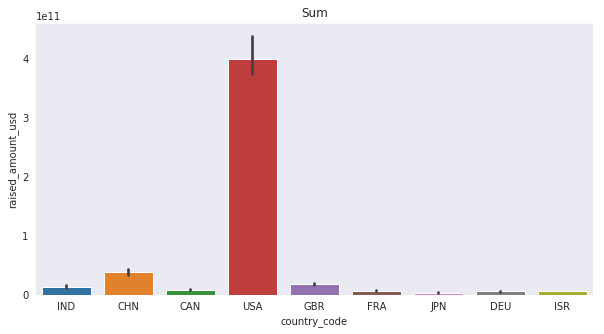

In [69]:
# Plotting sum across top 9 country_code 
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="country_code", y="raised_amount_usd", data=master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])], estimator=np.sum)
plt.title("Sum")
plt.show()

In [0]:
#From the above plotted graph and https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language,
#Top 3 English speaking countries:
#USA
#GBR
#INDIA

In [0]:
#CHECKPOINT 4: Sector Analysis 1

In [72]:
mapping.head()

category_list  ...  Social, Finance, Analytics, Advertising
0            NaN  ...                                        0
1             3D  ...                                        0
2    3D Printing  ...                                        0
3  3D Technology  ...                                        0
4     Accounting  ...                                        1

[5 rows x 10 columns]

In [73]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [0]:
#Removing the unwanted main sector:
mapping.drop('Blanks',axis=1,inplace=True)

In [0]:
#Mapping each sub sector in the category list to the main sector:
mapping=pd.melt(mapping, id_vars=['category_list'])

In [76]:
mapping.head(10)

category_list             variable  value
0                 NaN  Automotive & Sports      0
1                  3D  Automotive & Sports      0
2         3D Printing  Automotive & Sports      0
3       3D Technology  Automotive & Sports      0
4          Accounting  Automotive & Sports      0
5    Active Lifestyle  Automotive & Sports      0
6        Ad Targeting  Automotive & Sports      0
7  Advanced Materials  Automotive & Sports      0
8    Adventure Travel  Automotive & Sports      1
9         Advertising  Automotive & Sports      0

In [0]:
#Removing the rows having values 0:
mapping = mapping[mapping['value']==1]

In [78]:
mapping.head()

category_list             variable  value
8   Adventure Travel  Automotive & Sports      1
14         Aerospace  Automotive & Sports      1
45              Auto  Automotive & Sports      1
46   Automated Kiosk  Automotive & Sports      1
47        Automotive  Automotive & Sports      1

In [0]:
# Resetting the index, we can obtain explicitly true values:
mapping.reset_index(drop=True,inplace=True)

In [0]:
# Dropping the value column:
mapping.drop('value',axis=1,inplace=True)

In [0]:
# renaming the columns for better understanding
mapping = mapping.rename(columns={'category_list':'primary_sector','variable':'main_sector'})

In [83]:
mapping.head()

primary_sector          main_sector
0  Adventure Travel  Automotive & Sports
1         Aerospace  Automotive & Sports
2              Auto  Automotive & Sports
3   Automated Kiosk  Automotive & Sports
4        Automotive  Automotive & Sports

In [84]:
#merging "mapping dataframe" and "companies dataframe" to get the linkage between the companies data with the corresponding main sector
master_frame['category_list'].head()


0                 Media
3     Apps|Games|Mobile
4           Curated Web
8         Biotechnology
10            Analytics
Name: category_list, dtype: object

In [0]:
#converting the category list into primary sector with the  first string before the '|' is our primary sector using split()
master_frame['primary_sector'] = master_frame['category_list'].str.split('|',n=1,expand=True)[0]


In [86]:
#no of each primary sector in our master_frame dataset:
master_frame['primary_sector'].value_counts()

Biotechnology                      6547
Software                           3868
Advertising                        2129
Enterprise Software                1729
Health Care                        1704
E-Commerce                         1688
Mobile                             1539
Clean Technology                   1488
Analytics                          1484
Hardware + Software                1232
Curated Web                        1173
Health and Wellness                1003
Semiconductors                      881
Games                               872
Finance                             712
Manufacturing                       675
Cloud Computing                     579
Security                            559
Apps                                500
Web Hosting                         473
Education                           391
Android                             327
Internet                            321
Consulting                          295
Automotive                          285


In [87]:
len(mapping[mapping['main_sector']=='Blanks'])

0

In [88]:
master_frame[master_frame['primary_sector'].isna()]

company_permalink  ... primary_sector
99                              /organization/123feng-com  ...            NaN
133                                /organization/17-media  ...            NaN
181                                 /organization/1mxians  ...            NaN
528                             /organization/3pl-central  ...            NaN
571                           /organization/4-antibody-ag  ...            NaN
715                                   /organization/51cto  ...            NaN
729                   /organization/51wofang-æ å¿§ææ¿  ...            NaN
1430                       /organization/accelerator-corp  ...            NaN
1431                       /organization/accelerator-corp  ...            NaN
1432                       /organization/accelerator-corp  ...            NaN
1554                                /organization/acco-sa  ...            NaN
1968                      /organization/active-lives-care  ...            NaN
1969                      /organization/active-lives-care  ...            NaN
2217                       /organization/adaptive-media-3  ...            NaN
3615                          /organization/agrinnovation  ...            NaN
4858                                 /organization/altela  ...            NaN
5007                                   /organization/alva  ...            NaN
5513                           /organization/ams-sciences  ...            NaN
5818                              /organization/angle-plc  ...            NaN
6296                           /organization/apl-software  ...            NaN
6713             /organization/applied-spine-technologies  ...            NaN
6978                                    /organization/apr  ...            NaN
7769                          /organization/arroyo-optics  ...            NaN
7881                  /organization/artificial-muscle-inc  ...            NaN
8651                                /organization/atzuche  ...            NaN
9171                            /organization/avail-media  ...            NaN
9172                            /organization/avail-media  ...            NaN
9385                    /organization/avesta-technologies  ...            NaN
9435                               /organization/avidence  ...            NaN
10392                        /organization/baobab-studios  ...            NaN
...                                                   ...  ...            ...
102550                     /organization/trendlines-group  ...            NaN
102551                     /organization/trendlines-group  ...            NaN
103437                                 /organization/tube  ...            NaN
103438                                 /organization/tube  ...            NaN
104466                               /organization/ultreo  ...            NaN
104505                                /organization/umbra  ...            NaN
104754                  /organization/united-villages-inc  ...            NaN
104849          /organization/university-of-new-brunswick  ...            NaN
104872              /organization/university-venture-fund  ...            NaN
105284                        /organization/us-renewables  ...            NaN
105509                        /organization/vacation-view  ...            NaN
105690                             /organization/vandolay  ...            NaN
106117                /organization/velicept-therapeutics  ...            NaN
107050                         /organization/video-island  ...            NaN
107195  /organization/vietnam-australia-international-...  ...            NaN
107495                              /organization/viquity  ...            NaN
107833                  /organization/vision-software-pty  ...            NaN
108125                               /organization/vivant  ...            NaN
108247                           /organization/vizionware  ...            NaN
109287                      /organization/watchmaster-com  ...

In [89]:
  mapping['primary_sector'].isna().sum()

0

In [90]:
mapping.primary_sector.sort_values(ascending=True)

61                  0notechnology
62     0tural Language Processing
63               0tural Resources
319                     0vigation
227                            3D
228                   3D Printing
229                 3D Technology
540                      A0lytics
534                    Accounting
164              Active Lifestyle
535                  Ad Targeting
230            Advanced Materials
0                Adventure Travel
536                   Advertising
537         Advertising Exchanges
538          Advertising Networks
539         Advertising Platforms
339                        Advice
1                       Aerospace
231                   Agriculture
22          Air Pollution Control
340                    Algorithms
341                   All Markets
342                  All Students
165           Alter0tive Medicine
343                        Alumni
541                       Android
344                        Angels
166                   Animal Feed
542    Anythin

In [0]:
#Correcting the text completion:
mapping['primary_sector']=mapping['primary_sector'].str.replace('0','na')

In [92]:
mapping['primary_sector'].isna().sum()

0

In [93]:
master_frame['primary_sector'].isna().sum()

285

In [0]:
# Merging the two dataframes mapp_sub_sector and master_frame based on primary_sector column:
master_mapp_sector = pd.merge(master_frame,mapping,on='primary_sector',how='inner')

In [95]:
master_mapp_sector['main_sector'].isna().sum()

0

In [96]:
master_mapp_sector['main_sector'].value_counts()

Others                                     11052
Cleantech / Semiconductors                  9508
Social, Finance, Analytics, Advertising     9405
News, Search and Messaging                  5755
Health                                      3851
Manufacturing                               3204
Entertainment                               2651
Automotive & Sports                          724
Name: main_sector, dtype: int64

In [97]:
master_frame.shape

(46614, 16)

In [98]:
master_mapp_sector.shape

(46150, 17)

In [0]:
#Data where raised amount is between 5 to 15 million USD as mentioned above
master_mapp_sector = master_mapp_sector[master_mapp_sector['raised_amount_usd'].between(5000000,15000000,inclusive=True)]

In [103]:
d = master_mapp_sector[master_mapp_sector['country_code']=='USA']
d['count_invest']=d.groupby('main_sector')['main_sector'].count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
d.head()

company_permalink  ... count_invest
4   /organization/all-def-digital  ...          NaN
14       /organization/chefs-feed  ...          NaN
20   /organization/huffingtonpost  ...          NaN
21   /organization/huffingtonpost  ...          NaN
30        /organization/mediabong  ...          NaN

[5 rows x 18 columns]

In [105]:
#Creating three dataframes
D1 = master_mapp_sector[master_mapp_sector['country_code']=='USA']
D1['counts_invests'] = D1.groupby(['main_sector'])['main_sector'].transform('count')
D1['sum_invests'] = D1.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D1.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
D1.head()

company_permalink  ...   sum_invests
0  /organization/all-def-digital  ...  4.602750e+09
1       /organization/chefs-feed  ...  4.602750e+09
2   /organization/huffingtonpost  ...  4.602750e+09
3   /organization/huffingtonpost  ...  4.602750e+09
4        /organization/mediabong  ...  4.602750e+09

[5 rows x 19 columns]

In [107]:
D2 = master_mapp_sector[master_mapp_sector['country_code']=='GBR']
D2['counts_invests'] = D2.groupby(['main_sector'])['main_sector'].transform('count')
D2['sum_invests'] = D2.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D2.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
D2.head()

company_permalink  ...  sum_invests
0       /organization/90min  ...  463514687.0
1       /organization/90min  ...  463514687.0
2      /organization/flypay  ...  558500705.0
3     /organization/kaazing  ...  558500705.0
4  /organization/mindshapes  ...  558500705.0

[5 rows x 19 columns]

In [109]:
D3 = master_mapp_sector[master_mapp_sector['country_code']=='IND']
D3['counts_invests'] = D3.groupby(['main_sector'])['main_sector'].transform('count')
D3['sum_invests'] = D3.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D3.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
D3.head()

company_permalink  ...  sum_invests
0               /organization/-fame  ...  272080000.0
1            /organization/chillr-2  ...  408834545.0
2              /organization/jugnoo  ...  408834545.0
3           /organization/peppertap  ...  408834545.0
4  /organization/tinyowl-technology  ...  408834545.0

[5 rows x 19 columns]

In [111]:
# Total no of investments in country USA
D1.raised_amount_usd.count()

11240

In [112]:
# Total amount raised for companies in USA
D1['raised_amount_usd'].sum()

100606864149.0

In [113]:
# Total no of investments in country GBR
D2.raised_amount_usd.count()

581

In [114]:
# Total amount raised for companies in GBR
D2['raised_amount_usd'].sum()

5046263015.0

In [115]:
# Total no of investments in country IND
D3.raised_amount_usd.count()

315

In [116]:
# Total amount raised for companies in IND
D3['raised_amount_usd'].sum()

2820673602.0

In [117]:
#Top sector (based on count of investments) for country USA
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).index[0]

'Others'

In [118]:
#Top 3 sector (based on count of investments) for country USA
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2758
Social, Finance, Analytics, Advertising    2590
Cleantech / Semiconductors                 2147
Name: raised_amount_usd, dtype: int64

In [119]:
#Top sector (based on count of investments) for country GBR
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).index[0]

'Others'

In [120]:
#Top 3 sector (based on count of investments) for country GBR
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     140
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 115
Name: raised_amount_usd, dtype: int64

In [121]:
#Top sector (based on count of investments) for country IND
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).index[0]

'Others'

In [122]:
#Top 3 sector (based on count of investments) for country IND
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Name: raised_amount_usd, dtype: int64

In [0]:
#Number of investments in the top sector (ie 'Others') in D1 = 2758
#Number of investments in the top sector (ie 'Others') in D2 = 140
#Number of investments in the top sector (ie 'Others') in D3 = 103
#Number of investments in the second-best sector ('Social, Finance, Analytics, Advertising') in D1 = 2590
#Number of investments in the second-best sector ('Social, Finance, Analytics, Advertising') in D2 = 128
#Number of investments in the second-best sector ('Social, Finance, Analytics, Advertising') in D3 = 59
#Number of investments in the third-best sector ('Cleantech / Semiconductors') in D1 = 2147
#Number of investments in the third-best sector ('Cleantech / Semiconductors') in D2 = 2590
#Number of investments in the third-best sector ('News, Search and Messaging') in D3 = 115

In [125]:
# For the top sector (Others), which company received the highest investment for country USA
D1[D1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

permalink
/organization/virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

In [126]:
# For the top sector (Others), which company received the highest investment for country GBR
D2[D2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

permalink
/organization/electric-cloud    37000000.0
Name: raised_amount_usd, dtype: float64

In [127]:
# For the top sector (Others), which company received the highest investment for country IND
D3[D3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

permalink
/organization/firstcry-com    39000000.0
Name: raised_amount_usd, dtype: float64

In [128]:
# For the second-best sector(Social, Finance, Analytics, Advertising), which company received the highest investment for country USA
D1[D1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

permalink
/organization/shotspotter    67933006.0
Name: raised_amount_usd, dtype: float64

In [129]:
# For the second-best sector(Social, Finance, Analytics, Advertising), which company received the highest investment for country GBR
D2[D2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

permalink
/organization/celltick-technologies    37500000.0
Name: raised_amount_usd, dtype: float64

In [130]:
# For the second-best sector(Social, Finance, Analytics, Advertising), which company received the highest investment for country IND
D3[D3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

permalink
/organization/manthan-systems    50700000.0
Name: raised_amount_usd, dtype: float64

In [131]:
#CHECKPOINT 6:
 master_frame['funding_round_type'].value_counts() 

venture    46614
Name: funding_round_type, dtype: int64

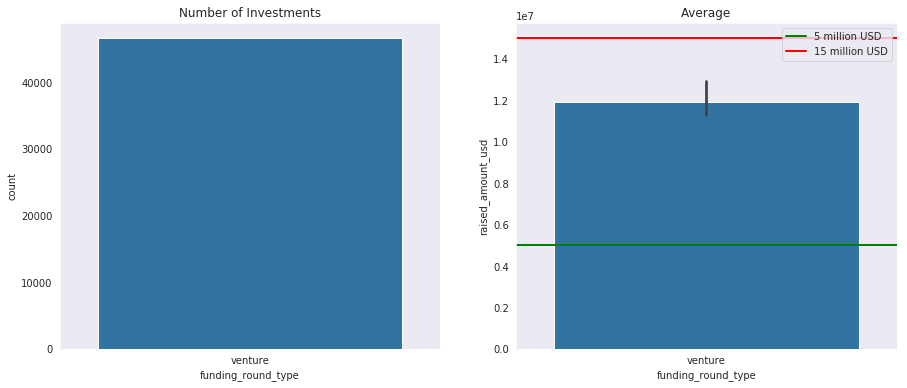

In [142]:
#TO have a clear understanding about the funding type(FT)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame_tmp)
plt.title("Number of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame_tmp, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000,label='5 million USD', linewidth=2, color = 'green')
plt.axhline(y=15000000, label='15 million USD',linewidth=2, color = 'red')
plt.legend()
plt.show()

No handles with labels found to put in legend.


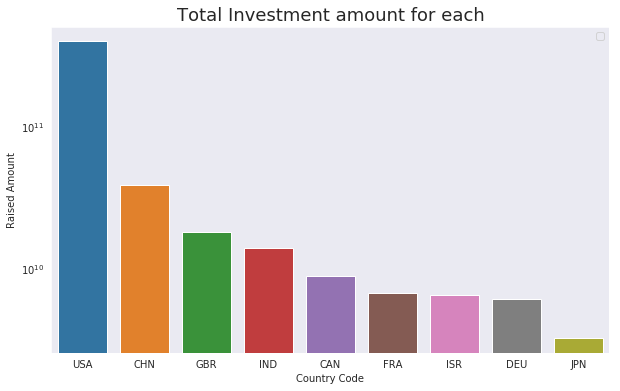

In [136]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
ax.set_yscale('log')
ax.set(xlabel='Country Code', ylabel='Raised Amount')
ax.set_title('Total Investment amount for each',fontsize =18)
plt.legend()
plt.show()

In [0]:
#For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 country
D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D=D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)
D=D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

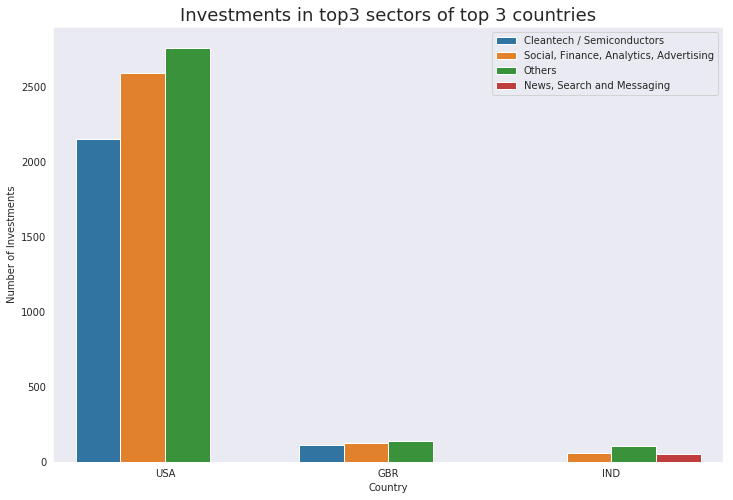

In [138]:
plt.figure(figsize=(12, 8))

# specify hue="categorical_variable"
ax=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=D,estimator=lambda x: len(x))
ax.set(xlabel='Country', ylabel='Number of Investments')
ax.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.legend()
plt.show()